<a href="https://colab.research.google.com/github/dongaIT/good-os/blob/main/Safe_Busan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

#안전한 부산 만들기 프로젝트
##개발배경
등하교하거나 산책을 할때면 한번씩 보이곤 했던 부산광역시의 안심귀갓길을 보고 실제로 효과가 있는지 확인해보았습니다.

또한 더욱 안전한 부산을 위해 구군별 연간 성범죄 발생 현황을 통해 안심귀갓길이 더 필요한 구군를 구해보았습니다.


<ipython-input-33-db95514351b1>:35: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


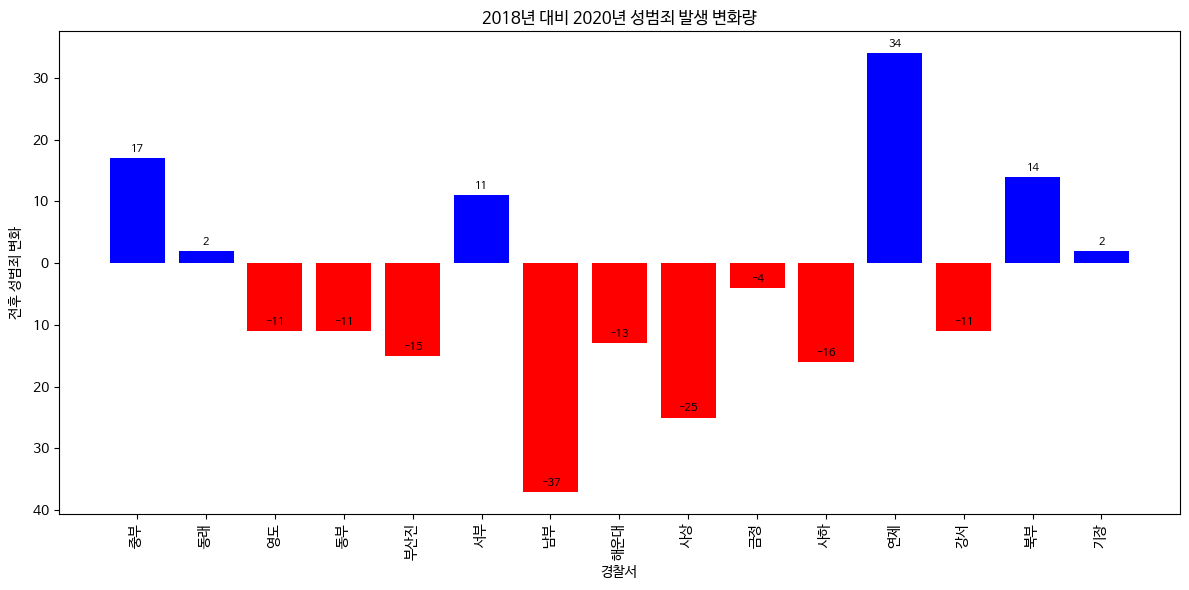

In [33]:
# prompt: /content/교부산지방경찰청_경찰서별5대범죄발생현황_설치 전 후 비교.csv를 읽고
# 연번이 2018인 항목들과 2020인 항목을 비교해주면 돼. 동일한 "경찰서"을 찾고 연번이 2020인 " 성범죄"에서 2018의
# " 성범죄"를 빼주면 될거같아 Y축은 전후 성범죄 변화 근데 증가했는지 감소했는지 알수있어야해 X축은 경찰서로 해서 그래프를 그려줘
# 강조사항 "성범죄" 가 아니고 " 성범죄야" 앞에 공백 있다!!

import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

# CSV 파일 읽기
df = pd.read_csv('/content/교부산지방경찰청_경찰서별5대범죄발생현황_설치 전 후 비교.csv', encoding='cp949')

# 연번이 2018인 데이터와 2020인 데이터 추출
df_2018 = df[df['연번'] == 2018]
df_2020 = df[df['연번'] == 2020]

# 경찰서를 기준으로 병합
merged_df = pd.merge(df_2018, df_2020, on='경찰서', suffixes=('_2018', '_2020'))

# 성범죄 발생 건수 차이 계산
merged_df['성범죄_변화'] = merged_df[' 성범죄_2020'] - merged_df[' 성범죄_2018']

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.bar(merged_df['경찰서'], merged_df['성범죄_변화'], color=['red' if x < 0 else 'blue' for x in merged_df['성범죄_변화']])
plt.xlabel('경찰서')
plt.ylabel('전후 성범죄 변화')
plt.title('2018년 대비 2020년 성범죄 발생 변화량')
plt.xticks(rotation=90)  # x축 레이블 회전

# 변화량 값 표시
for i, v in enumerate(merged_df['성범죄_변화']):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=8) # 값을 바 위에 표시

plt.tight_layout()
plt.show()


##성범죄 발생 변화
위의 그래프는 안심귀갓길 설치 전인 2018년과 2020년 성범죄 발생 변화를 나타낸 그래프입니다. 몇몇 구를 제외한 대부분의 구들이 성범죄 횟수가 감소 한 것을 보아 안심귀갓길의 효과가 보이는 것을 알 수 있습니다.

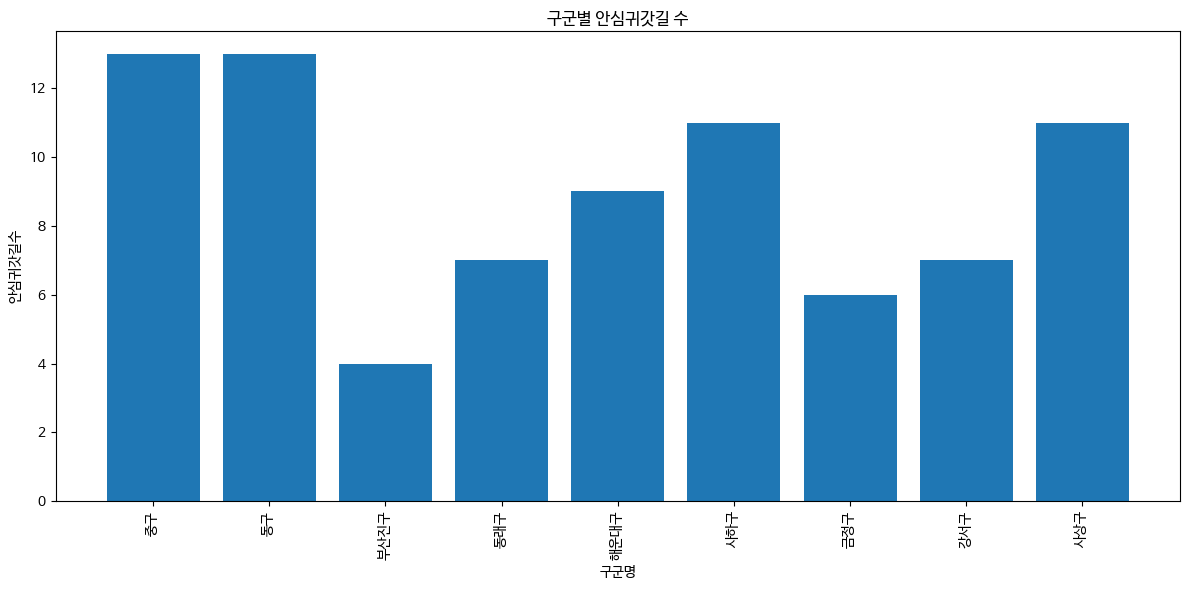

In [34]:
# prompt: /content/부산광역시 주민등록인구통계,안심귀갓길.csv 을 읽고 y축에는 "안심귀갓길수"을,
# x축에는 "구군명"을 적어서 그래프로 그려줘. 안심귀갓길수가 N/A인 구는 제외하고 그려줘

import pandas as pd
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')

# CSV 파일 읽기 (파일 경로 수정)
df = pd.read_csv('/content/부산광역시 주민등록인구통계,안심귀갓길.csv', encoding='cp949')

# '안심귀갓길수' 열이 N/A인 행 제거
df = df.dropna(subset=['안심귀갓길수'])

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.bar(df['구군명'], df['안심귀갓길수'])
plt.xlabel('구군명')
plt.ylabel('안심귀갓길수')
plt.title('구군별 안심귀갓길 수')
plt.xticks(rotation=90)  # x축 레이블 회전
plt.tight_layout()
plt.show()


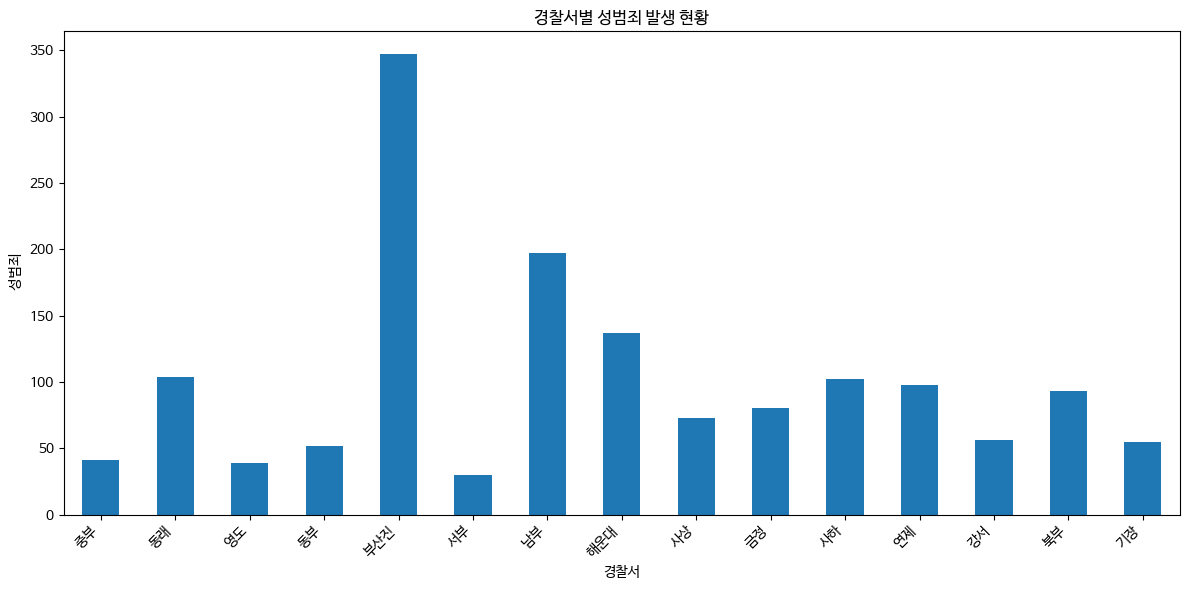

In [6]:
# prompt: /content/경찰청 부산광역시경찰청_경찰서별 5대 범죄 발생 현황_20231231.csv 를 읽고 Y 축에는 " 성범죄" 를 그려주고 X축은 "경찰서"을 적어줘

import pandas as pd
import matplotlib.pyplot as plt

# 폰트 설정 (필요시)
plt.rc('font', family='NanumBarunGothic')

try:
    # CSV 파일 읽기 (encoding='cp949' 추가)
    df = pd.read_csv('/content/경찰청 부산광역시경찰청_경찰서별 5대 범죄 발생 현황_20231231.csv', encoding='cp949')

    # '경찰서' 열을 인덱스로 설정
    df = df.set_index('경찰서')

    # '성범죄' 열을 선택하여 그래프 생성
    plt.figure(figsize=(12, 6))
    df[' 성범죄'].plot(kind='bar')
    plt.xlabel('경찰서')
    plt.ylabel(' 성범죄')
    plt.title('경찰서별 성범죄 발생 현황')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print("파일을 찾을 수 없습니다. 파일 경로를 확인해주세요.")
except KeyError:
    print("'경찰서' 또는 '성범죄' 열이 파일에서 발견되지 않았습니다.")
except Exception as e:
    print(f"오류 발생: {e}")


##안심귀갓길과 성범죄
위의 두 그래프를 보고 놀라운 점을 알 수 있습니다. 안심귀갓길이 가장 적은 부산진구에서 성범죄가 가장 많이 일어났다는 점입니다.


## SCR과 SPE
저는 위의 그래프에서 착안하여, 성범죄 대비 안심귀갓길 비율 (Safety Coverage Rate, SCR)
을 다음과 같이 정의 했습니다.

$$
SCR = \frac{\text{안심귀갓길 개수}}{\text{성범죄 발생 수}}
$$
SCR은 이렇게 이해 할 수 있습니다.


*   값이 클수록 안심귀갓길이 상대적으로 많아 안전 대책이 잘 마련된 지역
*   값이 작을수록 성범죄 발생 대비 안심귀갓길이 부족한 지역으로 볼 수 있습니다.


성범죄 예방도 (Safety Prevention Efficiency, SPE)

$$
SPE = \left( \frac{SCR}{\max(SCR)} \right) \times 100
$$
SPE는 다음과 같이 이해 할 수 있습니다.

*   SCR(안심귀갓길 개수 ÷ 성범죄 발생 건수) 값이 높을수록 예방 효과가 크다고 간주
*   최대 SCR은 비교하는 지역들 중에서 가장 높은 SCR 값을 사용
*   결과 값은 0~100% 범위로 변환하여 직관적으로 이해 가능




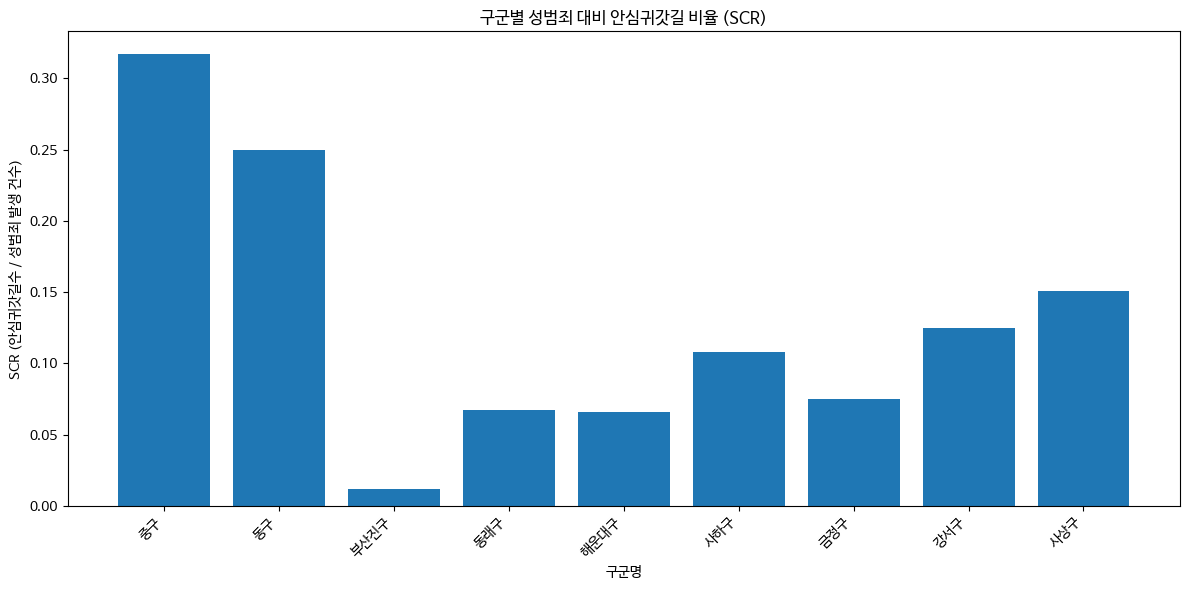

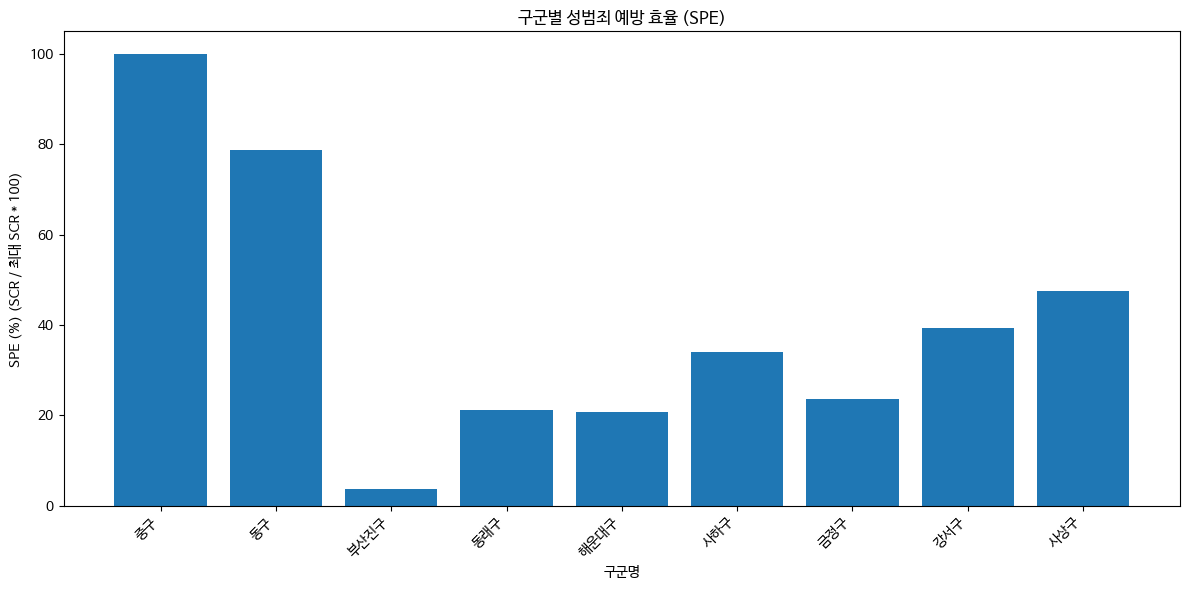

In [35]:
# prompt: /content/경찰청 부상광역시 경찰청 안심귀갓길, 성범죄 발생 현황_2023.xlsx를 읽고
# "N/A"로 나타나있는 항목은 앞으로 있을 그래프에서 제외 해주면 돼
# "구군명"별로  안심귀갓길 /" 성범죄"를  "SCR"로 정의하고 Y축에 SCR, X축에 "구군명"과 몇%인지 적어서 그래프로 그려줘
# 아까 구한 SCR중 최댓값을 max_SCR로 정의, 구군명 별로 SPE를 구해서 그래프로 그려주면돼.
# SPE는 (SCR/max_SCR)*100 으로 SCR을 상대적으로 나타낸 백분율이야.
#  강조사항 " 성범죄" 공백 하나 있고 항목명 "안심귀갓길수"
# 그리고 두그래프의 Y축에 SCR과 SPE(자세히) 에 대한 설명도 적어줘

import pandas as pd
import matplotlib.pyplot as plt

# 폰트 설정
plt.rc('font', family='NanumBarunGothic')

try:
    # 엑셀 파일 읽기
    df = pd.read_excel('/content/경찰청 부상광역시 경찰청 안심귀갓길, 성범죄 발생 현황_2023.xlsx')

    # "N/A" 값이 있는 행 제거
    df = df.replace("N/A", pd.NA).dropna()

    # SCR 계산
    df['SCR'] = df['안심귀갓길수'] / df[' 성범죄']

    # 최대 SCR 값 계산
    max_SCR = df['SCR'].max()

    # SPE 계산
    df['SPE'] = (df['SCR'] / max_SCR) * 100

    # SCR 그래프 그리기
    plt.figure(figsize=(12, 6))
    plt.bar(df['구군명'], df['SCR'])
    plt.xlabel('구군명')
    plt.ylabel('SCR (안심귀갓길수 / 성범죄 발생 건수)')  # Y축 설명 추가
    plt.title('구군별 성범죄 대비 안심귀갓길 비율 (SCR)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # SPE 그래프 그리기
    plt.figure(figsize=(12, 6))
    plt.bar(df['구군명'], df['SPE'])
    plt.xlabel('구군명')
    plt.ylabel('SPE (%) (SCR / 최대 SCR * 100)')  # Y축 설명 추가
    plt.title('구군별 성범죄 예방 효율 (SPE)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


except FileNotFoundError:
    print("파일을 찾을 수 없습니다. 파일 경로를 확인해주세요.")
except KeyError as e:
    print(f"필요한 열이 없습니다: {e}")
except Exception as e:
    print(f"오류 발생: {e}")


##그래프 설명
위의 두 그래프는 행정상으로 안심귀갓길의 위치와 개수가 확실하게 명시되어 있는 구들에 한해 그려진 그래프 입니다. 위의 그래프로 보건데, 가장 적은 안심귀갓길, 가장 많은 성범죄를 기록한 부산진구가 3.64%로 가장 낮은 SPE를 보였고, max_SCR로 정의된 중구가 100%로 가장 높은 SPE를 보였습니다.
##결론
이 프로젝트를 통해 부산진구는 더 많은 안심귀갓길 조성, 그리고 순찰이나 비상벨 구축을 통해 더욱 치안에 신경 써야 할것입니다.

##느낀점
몇몇 구의 안심귀갓길이 행정상으로 각구별 경찰서 사이트에 전혀 명시 되어있지않아 아쉬웠고 또 몇몇 구는 명확하게 기재되어있지않아서 몇개인지 알 수 없었던 점.

위 프로젝트의 한계점


*   안심귀갓길 설치 전 후의 드라마틱한 성범죄 변화가 관찰 되지 않아 인과관계가 증명되지 못할 수도 있음
*   최저 SPE를 기록한 부산진구에는 유동인구가 매우 많은 '서면'이 포함되어있어 자료의 신뢰성을 낮출 수 있음


